# Titanic Data Analysis

![alt text](http://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Data Set

| File Name        | Available Formats |
|------------------|-------------------|
| train            | .csv (59.76 kb)   |



## Setup Imports and Variables

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

## Explore the Data

Read the data:

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


View the data types of each column:

In [5]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Type 'object' is a string for pandas, which poses problems with machine learning algorithms.  If we want to use these as features, we'll need to convert these to number representations.

Get some basic information on the DataFrame:

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Gender         891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age, Cabin, and Embarked are missing values.  Cabin has too many missing values, whereas we might be able to infer values for Age and Embarked.

Generate various descriptive statistics on the DataFrame:

Now that we have a general idea of the data set contents, we can dive deeper into each column.  We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning algorithms.

Plot a few features to get a better idea of each:

In [7]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

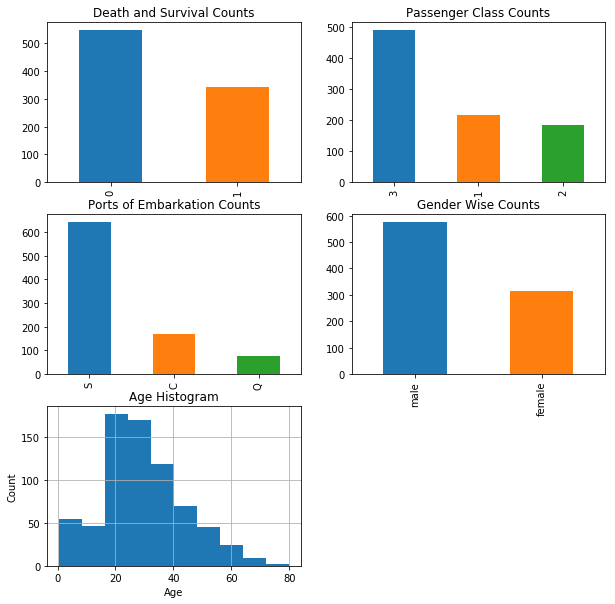

In [8]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['Survived'].value_counts().plot(kind='bar', 
                            title='Death and Survival Counts')


# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                title='Passenger Class Counts')




# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Embarked'].value_counts().plot(kind='bar', 
                            title='Ports of Embarkation Counts')

# Plot Gender wise counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['Gender'].value_counts().plot(kind='bar', 
                                       title='Gender Wise Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Next we'll explore various features to view their impact on survival rates.

## Feature: Passenger Classes

From our exploratory data analysis in the previous section, we see there are three passenger classes: First, Second, and Third class.  We'll determine which proportion of passengers survived based on their passenger class.

Generate a cross tab of Pclass and Survived:

In [9]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Plot the cross tab:

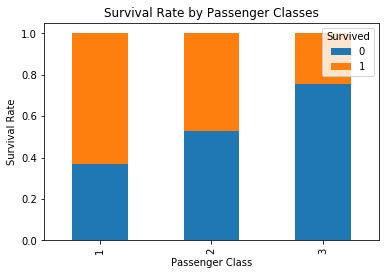

In [10]:
# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float),
                              axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
#pclass_xt_pct

We can see that passenger class seems to have a significant impact on whether a passenger survived.  Those in First Class the highest chance for survival.

## Feature: Gender

Gender might have also played a role in determining a passenger's survival rate.  We'll need to map Gender from a string to a number to prepare it for machine learning algorithms.

Generate a mapping of Gender from a string to a number representation:

In [11]:
Gender = sorted(df_train['Gender'].unique())
Genders_mapping = dict(zip(Gender, range(0, len(Gender) + 1)))
Genders_mapping

{'female': 0, 'male': 1}

Transform Gender from a string to a number representation:

In [14]:
df_train['Gender_Val'] = df_train['Gender'].map(Genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Plot a normalized cross tab for Gender_Val and Survived:

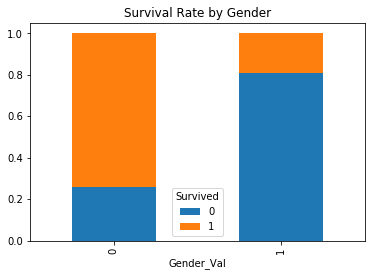

In [15]:
Gender_val_xt = pd.crosstab(df_train['Gender_Val'], df_train['Survived'])

Gender_val_xt_pct = Gender_val_xt.div(Gender_val_xt.sum(1).astype(float), axis=0)
Gender_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender')
plt.show()

The majority of females survived, whereas the majority of males did not.

Next we'll determine whether we can gain any insights on survival rate by looking at both Gender and Pclass.

Count males and females in each Pclass:

In [16]:
# Get the unique values of Pclass:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print ('M: ', p_class, len(df_train[(df_train['Gender'] == 
                                         'male') & 
                             (df_train['Pclass'] == p_class)]))
    print ('F: ', p_class, len(df_train[(df_train['Gender'] == 
                                         'female') & 
                             (df_train['Pclass'] == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


Plot survival rate by Gender and Pclass:

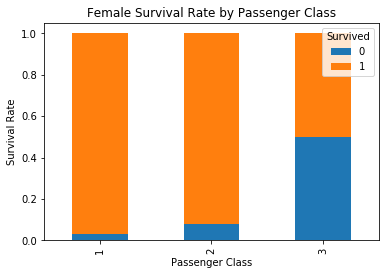

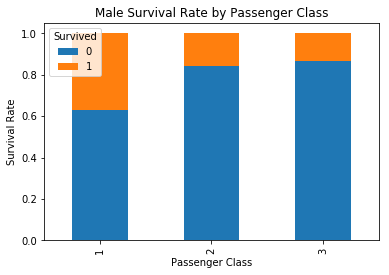

In [17]:
# Plot survival rate by Gender
females_df = df_train[df_train['Gender'] == 'female']

females_xt = pd.crosstab(females_df['Pclass'], 
                         df_train['Survived'])

females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), 
                                axis=0)

females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                title='Female Survival Rate by Passenger Class')

plt.xlabel('Passenger Class')

plt.ylabel('Survival Rate')







# Plot survival rate by Pclass
males_df = df_train[df_train['Gender'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

The vast majority of females in First and Second class survived.  Males in First class had the highest chance for survival.

## Feature: Embarked

The Embarked column might be an important feature but it is missing a couple data points which might pose a problem for machine learning algorithms:

In [18]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [19]:
df_train['Embarked'].fillna('S', inplace = True)

Prepare to map Embarked from a string to a number representation:

In [20]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
# Get the unique values of Embarked
embarked_locs = sorted(df_train['Embarked'].unique())

embarked_locs_mapping = dict(zip(embarked_locs, 
                                 range(0, 
                                len(embarked_locs) + 1)))
embarked_locs_mapping

{'C': 0, 'Q': 1, 'S': 2}

Transform Embarked from a string to a number representation to prepare it for machine learning algorithms:

In [22]:
df_train['Embarked_Val'] = df_train['Embarked'].map(embarked_locs_mapping).astype(int)

df_train.head(1)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_Val,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1,2


Plot the histogram for Embarked_Val:

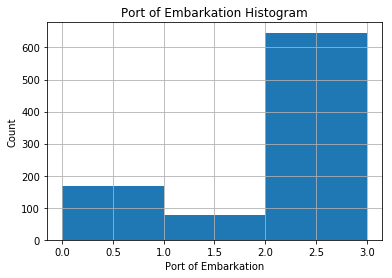

In [23]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs),
                              range=(0, 3))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

Since the vast majority of passengers embarked in 'S': 3, we assign the missing values in Embarked to 'S': 

In [24]:
if len(df_train[df_train['Embarked'].isnull()] > 0):
    df_train.replace({'Embarked_Val' : 
                   { embarked_locs_mapping[np.nan] : 
                    embarked_locs_mapping['S'] 
                   }
               }, 
               inplace=True)

Verify we do not have any more NaNs for Embarked_Val:

In [25]:
embarked_locs = sorted(df_train['Embarked_Val'].unique())
embarked_locs

[0, 1, 2]

Plot a normalized cross tab for Embarked_Val and Survived:

Text(0,0.5,'Survival Rate')

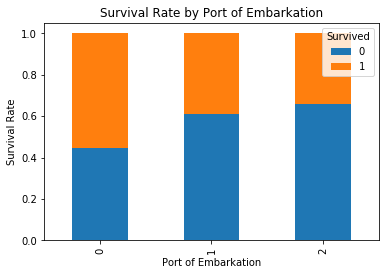

In [26]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], 
                              df_train['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).
                        astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

It appears those that embarked in location 'C': 0 had the highest rate of survival.  We'll dig in some more to see why this might be the case.  Below we plot a graphs to determine Gender and passenger class makeup for each port:

In [32]:
inverse_map = {v: k for k, v in 
               embarked_locs_mapping.items()}

In [35]:
embarked_locs

[0, 1, 2]

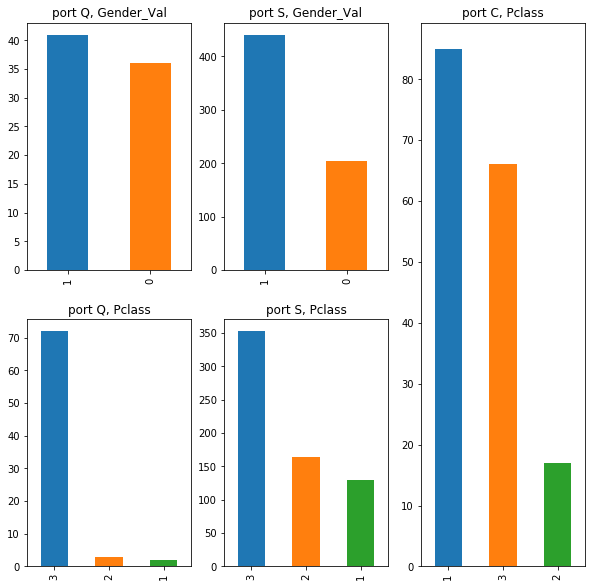

In [36]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 

rows = 2
cols = 3
col_names = ('Gender_Val', 'Pclass')

for portIdx in embarked_locs:
    for colIdx in range(0, len(col_names)):
        plt.subplot2grid((rows, cols), (colIdx,
                                        portIdx - 1))
        plt.title('port ' + inverse_map[portIdx] + 
                  ', ' + col_names[colIdx])
        df_train[df_train['Embarked_Val'] == portIdx]\
        [col_names[colIdx]] \
            .value_counts().plot(kind='bar')
            

Leaving Embarked as integers implies ordering in the values, which does not exist.  Another way to represent Embarked without ordering is to create dummy variables:

In [166]:
df_train = pd.concat([df_train, pd.get_dummies
                      (df_train['Embarked_Val'], 
                       prefix='Embarked_Val')], axis=1)

## Feature: Age

The Age column seems like an important feature--unfortunately it is missing many values.  We'll need to fill in the missing values like we did with Embarked.

Filter to view missing Age values:

In [167]:
df_train[df_train['Age'].isnull()][['Gender', 
                    'Pclass', 'Age']].head()

,Gender,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


Determine the Age typical for each passenger class by Gender_Val.  We'll use the median instead of the mean because the Age histogram seems to be right skewed.

In [168]:
# To keep Age in tact, make a copy of it called AgeFill 
# that we will use to fill in the missing ages:
df_train['AgeFill'] = df_train['Age']

# Populate AgeFill
df_train['AgeFill'] = df_train['AgeFill'] 
        .groupby([df_train['Gender_Val'], 
                  df_train['Pclass']]) 
                .apply(lambda x: x.fillna(x.median()))

Ensure AgeFill does not contain any missing values:

In [169]:
len(df_train[df_train['AgeFill'].isnull()])

0

Plot a normalized cross tab for AgeFill and Survived:

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0,0.5,'Age')

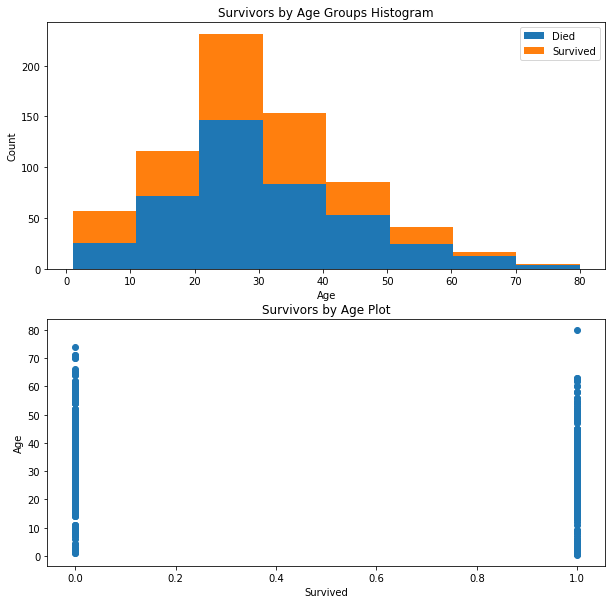

In [172]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, 
                         figsize=fizsize_with_subplots)

# Histogram of AgeFill segmented by Survived
df1 = df_train[df_train['Survived'] == 0]['Age']
df2 = df_train[df_train['Survived'] == 1]['Age']
max_age = max(df_train['AgeFill'])

axes[0].hist([df1, df2], 
             bins=int(max_age / bin_size), 
             range=(1, max_age), 
             stacked=True)


axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[1].scatter(df_train['Survived'], 
                df_train['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')


Unfortunately, the graphs above do not seem to clearly show any insights.  We'll keep digging further.

Plot AgeFill density by Pclass:

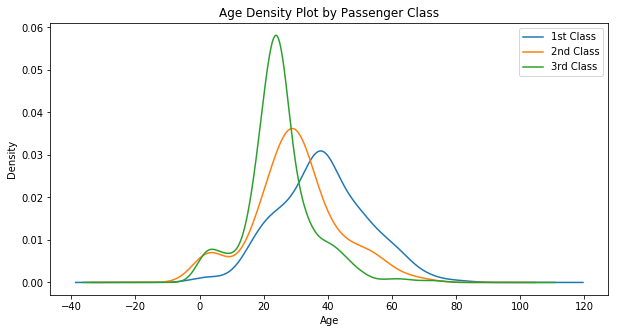

In [113]:
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

When looking at AgeFill density by Pclass, we see the first class passengers were generally older then second class passengers, which in turn were older than third class passengers.  We've determined that first class passengers had a higher survival rate than second class passengers, which in turn had a higher survival rate than third class passengers.

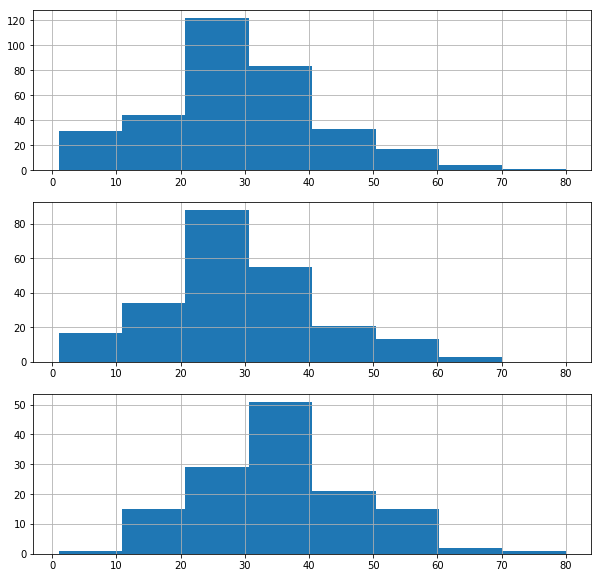

In [114]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)

# Plot the AgeFill histogram for Survivors
plt.subplot2grid(fig_dims, (0, 0))
survived_df = df_train[df_train['Survived'] == 1]
survived_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))

# Plot the AgeFill histogram for Females
plt.subplot2grid(fig_dims, (1, 0))
females_df = df_train[(df_train['Gender_Val'] == 0) & (df_train['Survived'] == 1)]
females_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))

# Plot the AgeFill histogram for first class passengers
plt.subplot2grid(fig_dims, (2, 0))
class1_df = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]
class1_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))

In the first graph, we see that most survivors come from the 20's to 30's age ranges and might be explained by the following two graphs.  The second graph shows most females are within their 20's.  The third graph shows most first class passengers are within their 30's.

## Feature: Family Size

Feature enginering involves creating new features or modifying existing features which might be advantageous to a machine learning algorithm.

Define a new feature FamilySize that is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses):

In [115]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_Val,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0,0,1,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,0,1,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,0,1,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,0,0,1,35.0,0


Plot a histogram of FamilySize:

Text(0.5,1,'Family Size Histogram')

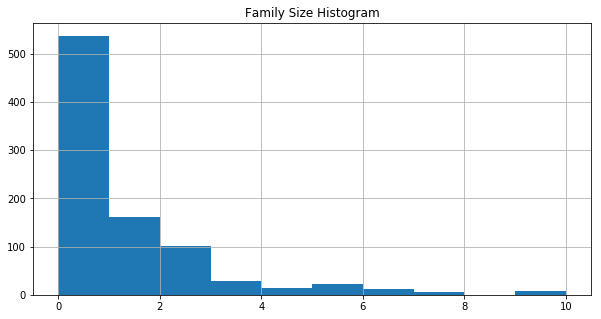

In [116]:
df_train['FamilySize'].hist()
plt.title('Family Size Histogram')

Plot a histogram of AgeFill segmented by Survived:

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Survivors by Family Size')

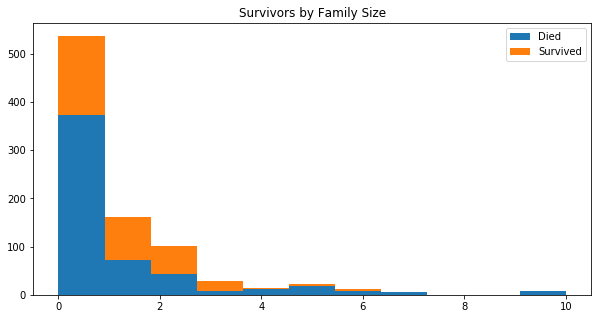

In [117]:
# Get the unique values of Embarked and its maximum
family_sizes = sorted(df_train['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = df_train[df_train['Survived'] == 0]['FamilySize']
df2 = df_train[df_train['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=family_size_max + 1, 
         range=(0, family_size_max), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

Write Conclusion for above